# Implementação Multi Layer Perceptron 

## 1) Importar os módulos necessários do Sklearn 

In [12]:
from sklearn.datasets import load_iris
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

## 2) Separa Dataset em treinamento e teste 
O conjunto de dados será dividído em teste e treinamento. Uma procentagem de 20% dos conjuntos de dados será reservado para testar a acurácia do modelo.


In [3]:
# Carrega o conjunto de dados
ds = load_iris()
#print(ds)

# Pega os atributos do conjunto de dados
X = pd.DataFrame(ds.data,columns=ds.feature_names)
#print(X)

# Pega as classes do conjunto de dados 
y = ds.target
# print(y)

# Separa os dados em teste e treino em uma porcentadem de 20% reproduzível entre chamadas de funções
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, random_state=1, test_size=0.2)



## 3) Normalizar os dados
Os dados precisam ser normalizados uma vez que diferentes atributos (váriaveis independentes) possuem diferentes faixas de valores.


In [4]:
normPadrao = StandardScaler()

# Ajusta os dados e transforma eles
X_trainNorm = normPadrao.fit_transform(X_treino)

X_testNorm = normPadrao.fit_transform(X_teste)

## 4) Arquitetura da rede
Será criado duas configurações de rede alterando o número de camadas e neurônios. O otimizador usado em ambos os casos será o Adam e a função de ativação RELU. 

In [7]:
config_1 = MLPClassifier(hidden_layer_sizes=(256, 128, 64, 32), activation="relu", random_state=1, max_iter=2000).fit(X_trainNorm, y_treino)

config_2 = MLPClassifier(hidden_layer_sizes=(256, 256, 256, 256, 256, 256), activation="relu", random_state=1, max_iter=2000).fit(X_trainNorm, y_treino)

## 5) Teste das redes
Os modelos treinados são usados para predizer as classes dos valores reservados para teste, os quais ainda não foram vistos pelas redes. Então, a precisão média é calculada nos dados e rótulos de teste fornecidos

In [10]:
# ? Pq com o y_teste e não y_prev
y_prev1 = config_1.predict(X_testNorm)
print("A pontuação é ", config_1.score(X_testNorm, y_teste))

y_prev2 = config_2.predict(X_testNorm)
print("A pontuação é ", config_2.score(X_testNorm, y_teste))

A pontuação é  0.9
A pontuação é  0.9


## 6) Gerar matriz de confusão 
Permite obeservar as classifições erradas feitas pelos modelos.

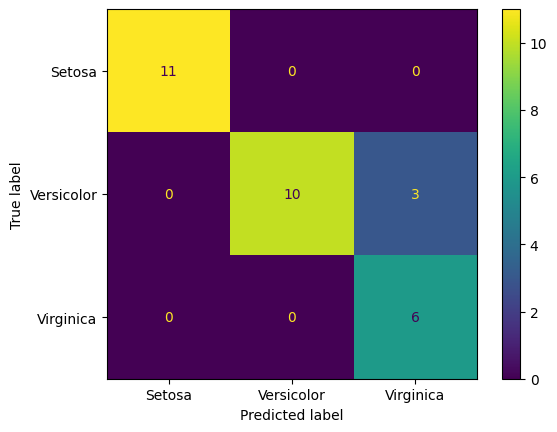

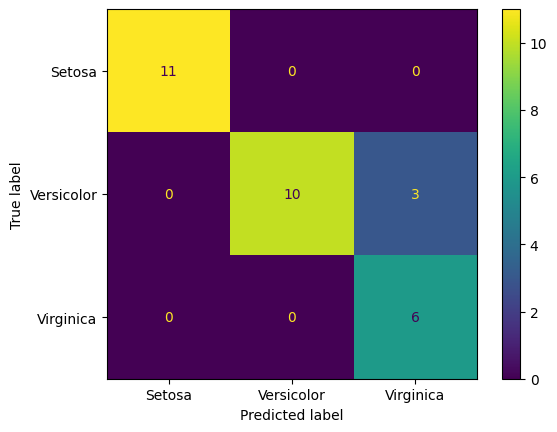

In [19]:
cm1 = confusion_matrix(y_teste, y_prev1, labels=config_1.classes_)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1,display_labels=["Setosa","Versicolor","Virginica"])
disp1.plot()

cm2 = confusion_matrix(y_teste, y_prev2, labels=config_2.classes_)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2,display_labels=["Setosa","Versicolor","Virginica"])
disp2.plot()
plt.show()